# Car Price Prediction

## Objectives 

Using linear regression is to build a model that can accurately estimate the price of a car based on its features. This helps users make informed decisions about car valuation, buying, selling, and related activities. It also provides you with practical experience in applying linear regression techniques and machine learning concepts.

https://github.com/Lab-of-Infinity/Internship/blob/main/Flight%20Price%20Predication%20using%20Machine%20Learning/Flight%20Price%20Predication%20Using%20ML%20Techniques.ipynb

## Importing the libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data as a Pandas DataFrame

In [2]:
car = pd.read_csv("ML-Essentials/data/Automobile.csv")

### Display the first 5 rows

In [3]:
car.head()

,Unnamed: 0,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


### Removing unnecessary columns

In [4]:
car.set_index('index', inplace=True)
car.drop(["Unnamed: 0"], axis= 1, inplace = True)
car.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


### Cheaking the number of rows and columns

In [5]:
car.shape

(61, 9)

###  Displays a concise summary of the dataframe

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


### Display the missing values in the DataFrame.

In [7]:
car.isna().sum().to_frame().rename(columns={0:"Missing Values"})

,Missing Values
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,3


There are 3 missing values in price

In [8]:
car[car.isna().any(axis=1)]

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


###  Replacing missing values with the previous valid values


In [9]:
car.fillna(method="ffill", inplace=True)
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             61 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


##  Cheaking the duplicate values  Cheaking the duplicate values  

In [10]:
car.duplicated().sum()

1

There is a 1 duplicate value

In [11]:
car.drop_duplicates(inplace=True)

In [12]:
car.shape

(60, 9)

##  EDA 

C:\Users\anwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


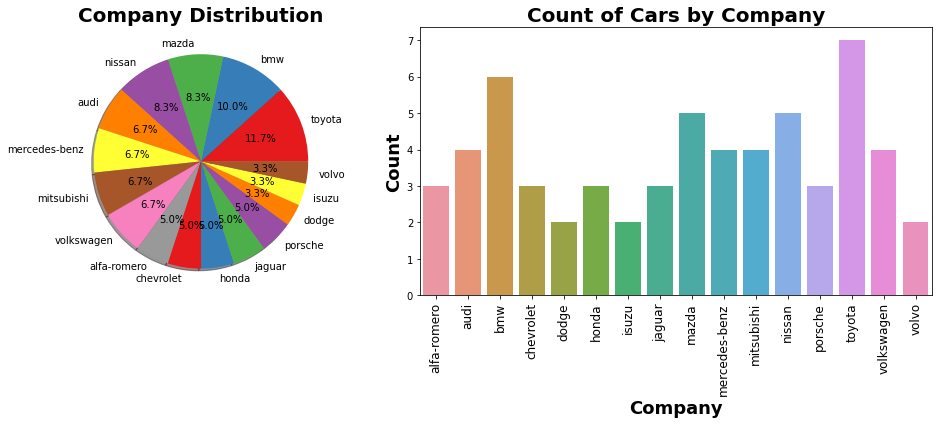

In [15]:
plt.rcParams["figure.autolayout"] = True  # Adjust figure layout
sns.set_palette('Set1')  # Set color palette
f, ax = plt.subplots(1, 2, figsize=(14, 6))  # Create the figure and subplots

car['company'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0], shadow=True)  # Pie chart - company distribution   

ax[0].set_title('Company Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

sns.countplot('company', data=car, ax=ax[1]) # Countplot - count of cars by company  

ax[1].set_title('Count of Cars by Company', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Company", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=18, fontweight='bold')

plt.xticks(fontsize=12, rotation=90)

plt.tight_layout() # Adjust spacing between subplots
plt.show()

C:\Users\anwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


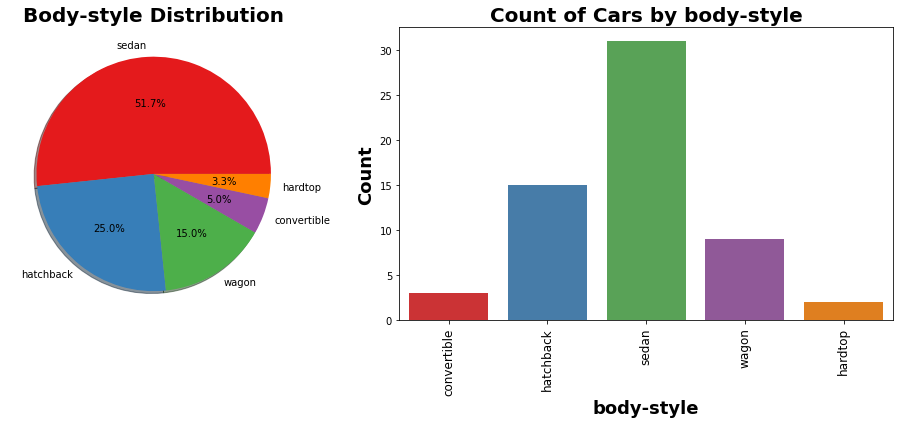

In [16]:
plt.rcParams["figure.autolayout"] = True  # Adjust figure layout
sns.set_palette('Set1')  # Set color palette
f, ax = plt.subplots(1, 2, figsize=(14, 6))  # Create the figure and subplots

car['body-style'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0], shadow=True)  # Pie chart - company distribution   

ax[0].set_title('Body-style Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

sns.countplot('body-style', data=car, ax=ax[1]) # Countplot - count of cars by company  

ax[1].set_title('Count of Cars by body-style', fontsize=20, fontweight='bold')
ax[1].set_xlabel("body-style", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=18, fontweight='bold')

plt.xticks(fontsize=12, rotation=90)

plt.tight_layout() # Adjust spacing between subplots
plt.show()

###  Fetching only the columns with categorical values.

In [17]:
category_cols =car.select_dtypes(["object"]).head()
category_cols

,company,body-style,engine-type,num-of-cylinders
index,,,,
0,alfa-romero,convertible,dohc,four
1,alfa-romero,convertible,dohc,four
2,alfa-romero,hatchback,ohcv,six
3,audi,sedan,ohc,four
4,audi,sedan,ohc,five


In [18]:
for col in category_cols:
    print(car[col].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan' 'porsche' 'toyota'
 'volkswagen' 'volvo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


# Heatmap

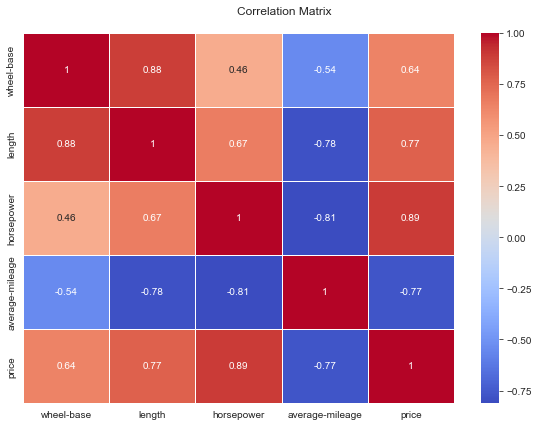

In [19]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.heatmap(data=car.corr(),
           annot=True,
           linewidth=0.5,
           cmap="coolwarm")
plt.suptitle("Correlation Matrix")
plt.show()

### Changing categorical data 

 The LabelEncoder is a utility class in scikit-learn that helps with encoding categorical variables into numerical labels

In [20]:
from sklearn.preprocessing import LabelEncoder

**Define label encoder object**

In [21]:
lbl_encoder = LabelEncoder()

**Encode the labels in column company**

In [22]:
car['company'] = lbl_encoder.fit_transform(car['company'])
car['body-style'] = lbl_encoder.fit_transform(car['body-style'])
car['engine-type'] = lbl_encoder.fit_transform(car['engine-type'])
car.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,four,111,21,13495.0
1,0,0,88.6,168.8,0,four,111,21,16500.0
2,0,2,94.5,171.2,5,six,154,19,16500.0
3,1,3,99.8,176.6,3,four,102,24,13950.0
4,1,3,99.4,176.6,3,five,115,18,17450.0


In [23]:
car = car.replace({'num-of-cylinders':{
    'four':4,
    'six': 6,
    'five': 5,
    'three': 3,
    'twelve': 12,
    'two': 2,
    'eight': 8}
                              })
car.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,4,111,21,13495.0
1,0,0,88.6,168.8,0,4,111,21,16500.0
2,0,2,94.5,171.2,5,6,154,19,16500.0
3,1,3,99.8,176.6,3,4,102,24,13950.0
4,1,3,99.4,176.6,3,5,115,18,17450.0


### Cheaking the correlation

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
car.corr().style.background_gradient(cmap="coolwarm")

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
company,1.000000,0.174081,-0.009053,-0.035657,0.109780,-0.055694,-0.109936,0.207207,-0.162811
body-style,0.174081,1.000000,0.425397,0.307151,0.046600,-0.036432,-0.165328,0.043154,-0.133610
wheel-base,-0.009053,0.425397,1.000000,0.879898,0.025539,0.496686,0.459609,-0.544259,0.644783
length,-0.035657,0.307151,0.879898,1.000000,0.008563,0.613233,0.665179,-0.782149,0.771483
engine-type,0.109780,0.046600,0.025539,0.008563,1.000000,0.146179,0.027060,-0.061585,0.048069
num-of-cylinders,-0.055694,-0.036432,0.496686,0.613233,0.146179,1.000000,0.852027,-0.623616,0.781680
horsepower,-0.109936,-0.165328,0.459609,0.665179,0.027060,0.852027,1.000000,-0.809791,0.893692
average-mileage,0.207207,0.043154,-0.544259,-0.782149,-0.061585,-0.623616,-0.809791,1.000000,-0.774231
price,-0.162811,-0.133610,0.644783,0.771483,0.048069,0.781680,0.893692,-0.774231,1.000000


<Figure size 504x360 with 0 Axes>

## Data visualization

### Pairplot 

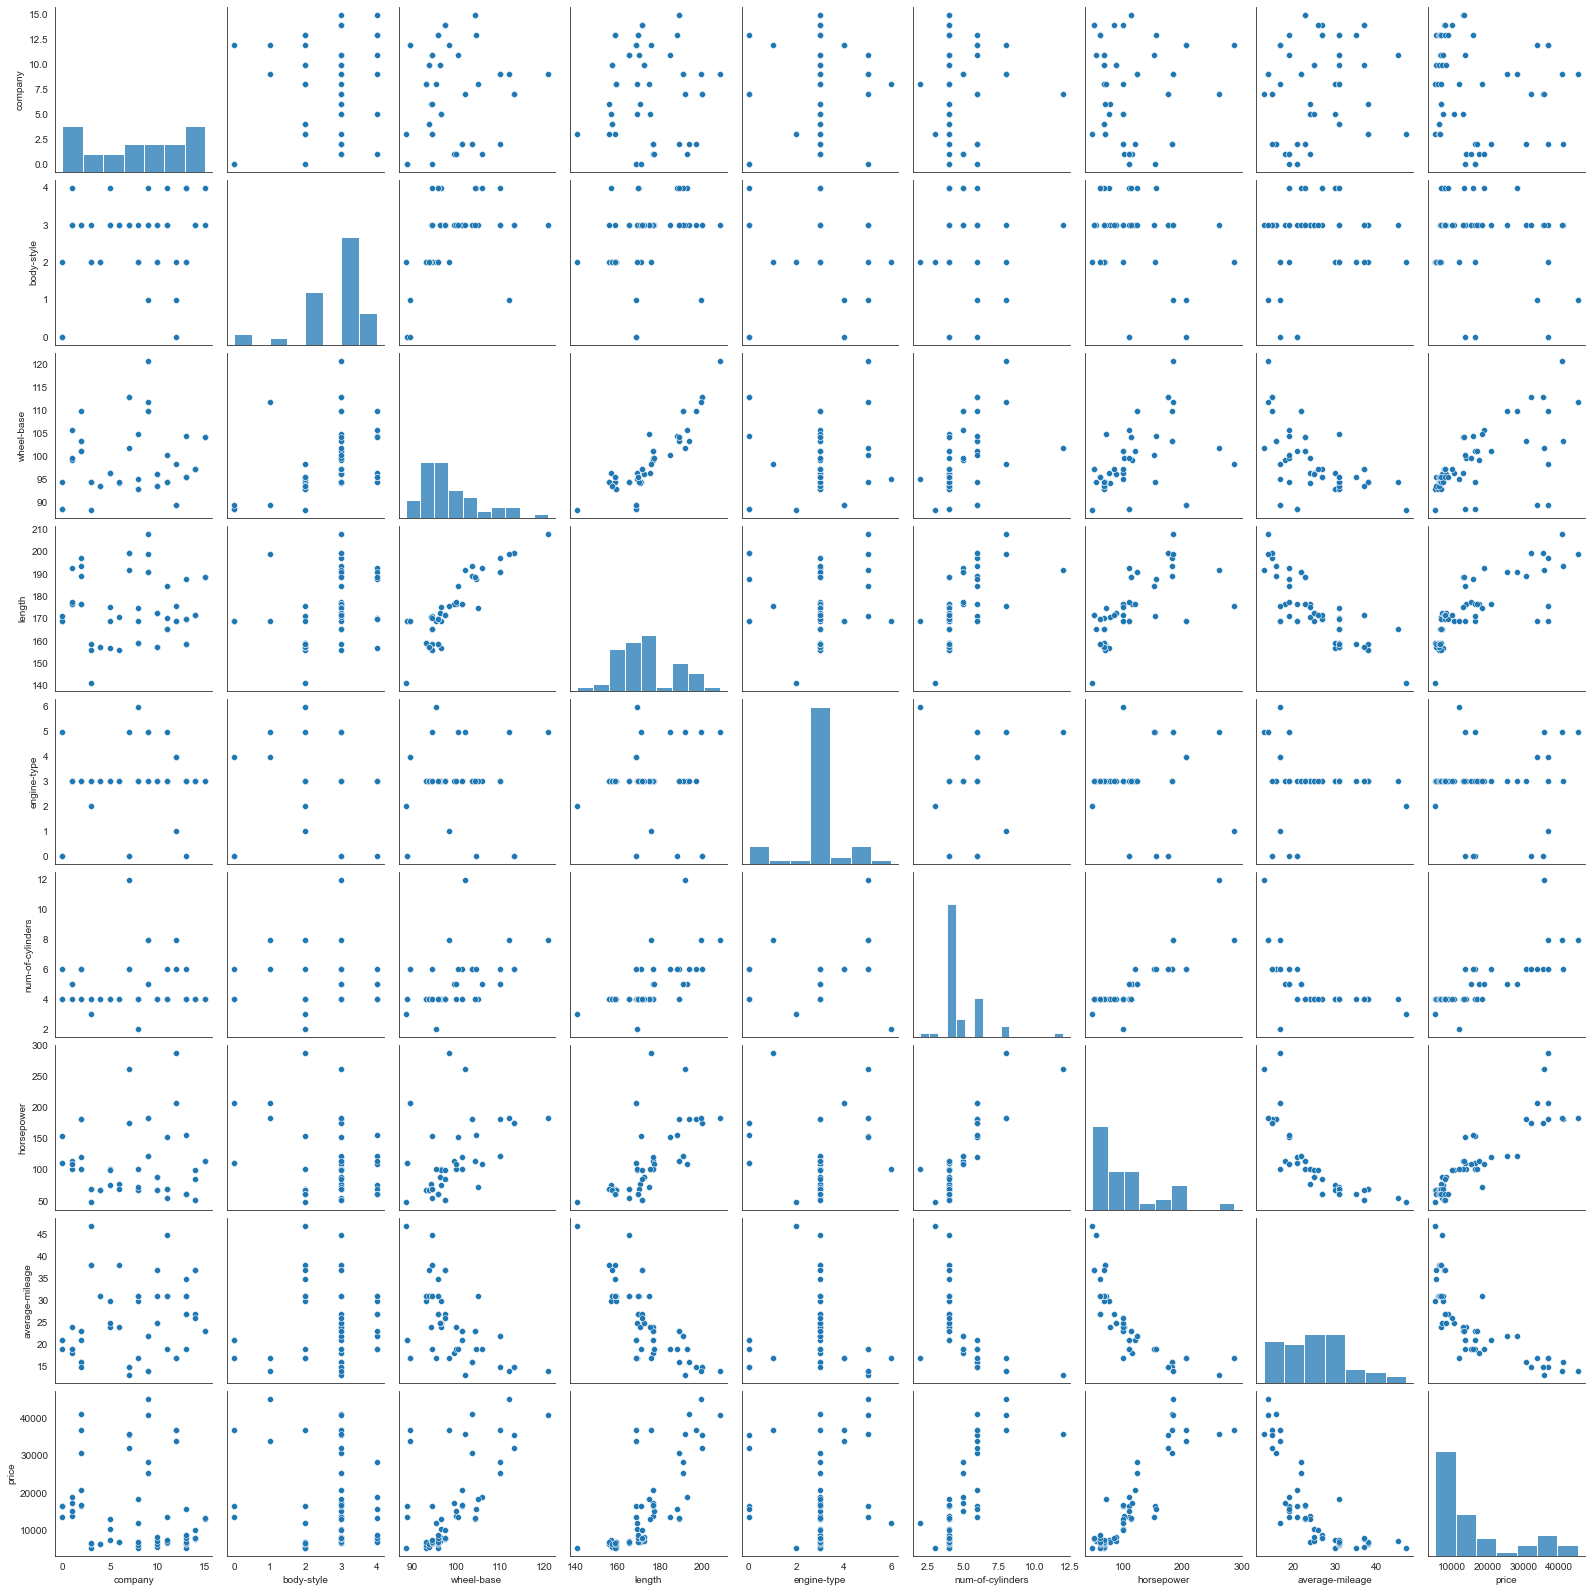

In [21]:
sns.pairplot(car)

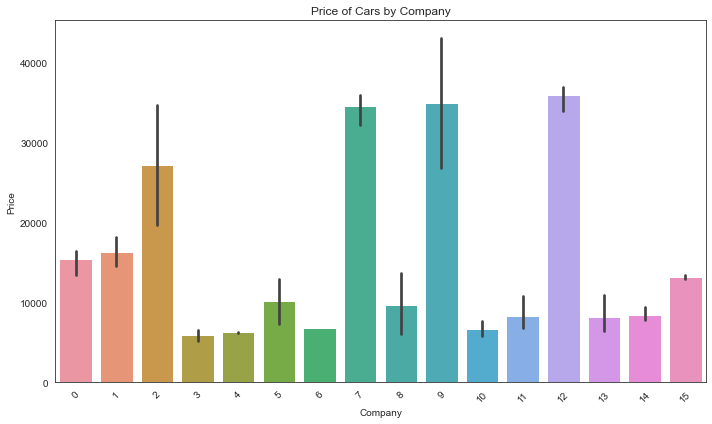

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=car, x="company", y="price")
plt.xlabel("Company")
plt.ylabel("Price")
plt.title("Price of Cars by Company")
plt.xticks(rotation=45)
plt.show()

**Insights**

The "company" feature is plotted on the x-axis, and the "price" variable is plotted on the y-axis. The bars represent the average price of cars for each company.

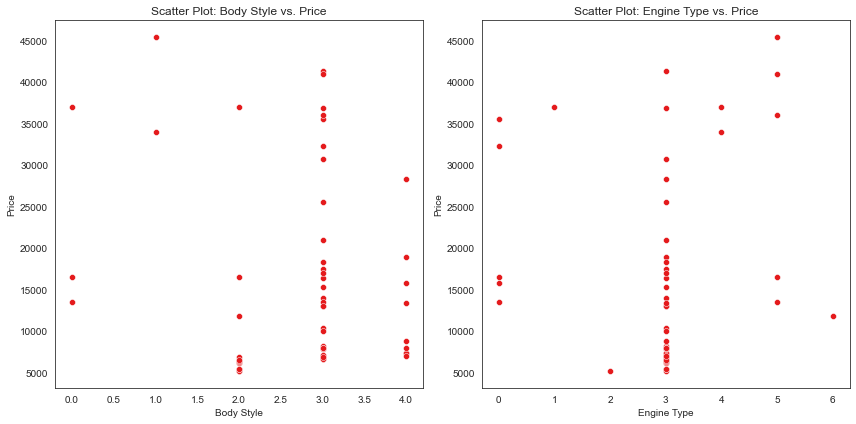

In [26]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.scatterplot(data=car, x="body-style", y="price")
plt.xlabel("Body Style")
plt.ylabel("Price")
plt.title("Scatter Plot: Body Style vs. Price")

plt.subplot(122)
sns.scatterplot(data=car, x="engine-type", y="price")
plt.xlabel("Engine Type")
plt.ylabel("Price")
plt.title("Scatter Plot: Engine Type vs. Price")

plt.tight_layout()
plt.show()

**Insights**

The categorical variable i.e., Bodystyle and Engine Types has little or no relationship with price. The parallel lines indicate that the categorical variable does not have a significant impact on the values of the continuous variable.

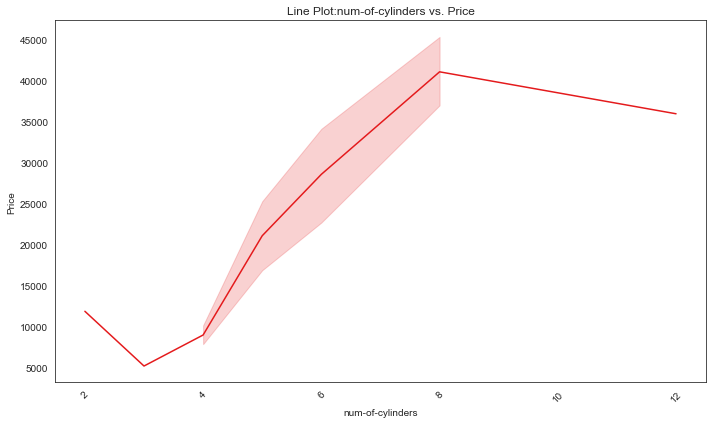

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=car, x="num-of-cylinders", y="price")
plt.xlabel("num-of-cylinders")
plt.ylabel("Price")
plt.title("Line Plot:num-of-cylinders vs. Price")
plt.xticks(rotation=45)
plt.show()

**Insights**

As the price increases num-of-cylinders are also increases. They have positive correlation

<Figure size 720x432 with 0 Axes>

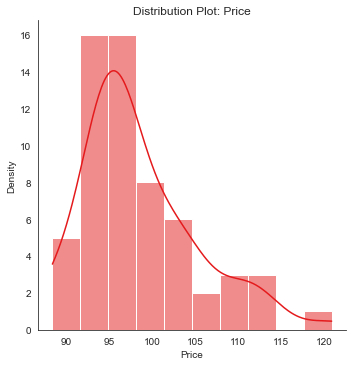

In [28]:
plt.figure(figsize=(10, 6))
sns.displot(data=car, x="wheel-base", kde=True)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Distribution Plot: Price")
plt.show()

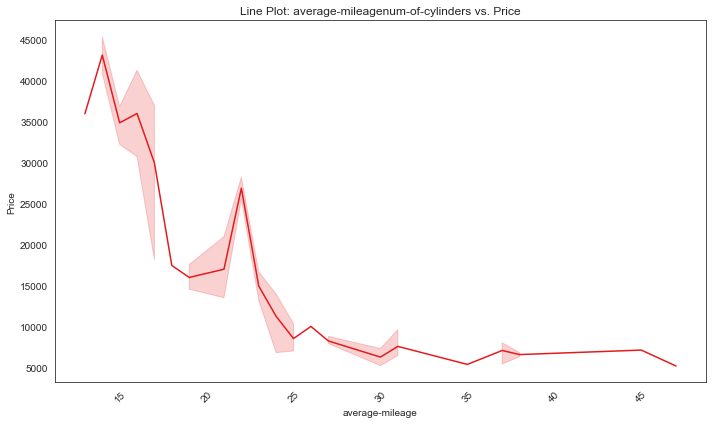

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=car, x="average-mileage", y="price")
plt.xlabel("average-mileage")
plt.ylabel("Price")
plt.title("Line Plot: average-mileagenum-of-cylinders vs. Price")
plt.xticks(rotation=45)
plt.show()


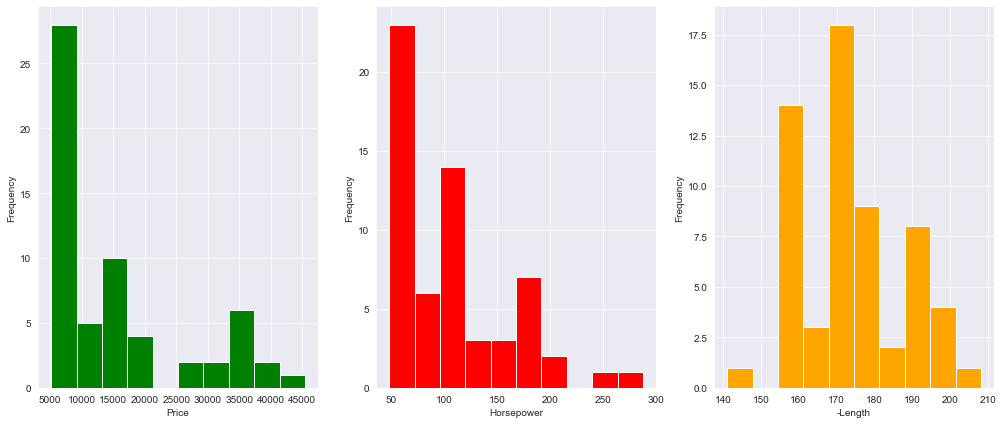

In [30]:
plt.figure(figsize=(14, 6))
sns.set_style('darkgrid')

kwargs = {"kind": "hist", 
          "bins": 10}

plt.subplot(131)
car.price.plot(**kwargs, color="g")
# plt.xticks(rotation="vertical")
plt.xlabel("Price")

plt.subplot(132)
car.horsepower.plot(**kwargs, color="r")
# plt.xticks(ticks=True)
plt.xlabel("Horsepower")

plt.subplot(133)
car.length.plot(**kwargs, color="orange")
# plt.xticks(ticks=True)
plt.xlabel("-Length")

plt.show()

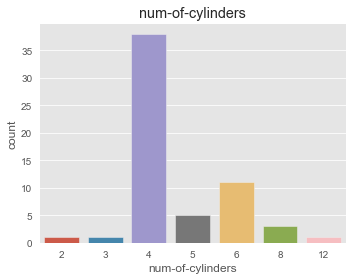

In [31]:
plt.figure(figsize=(5,4))
plt.style.use("ggplot")

sns.countplot(x="num-of-cylinders", data=car)
plt.title('num-of-cylinders')
plt.show()

In [32]:
car.price.skew()

1.1751107811572674

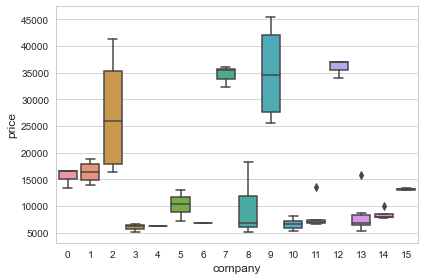

In [33]:
sns.set_style("whitegrid")
sns.boxplot(data=car, x="company", y="price")
plt.show()

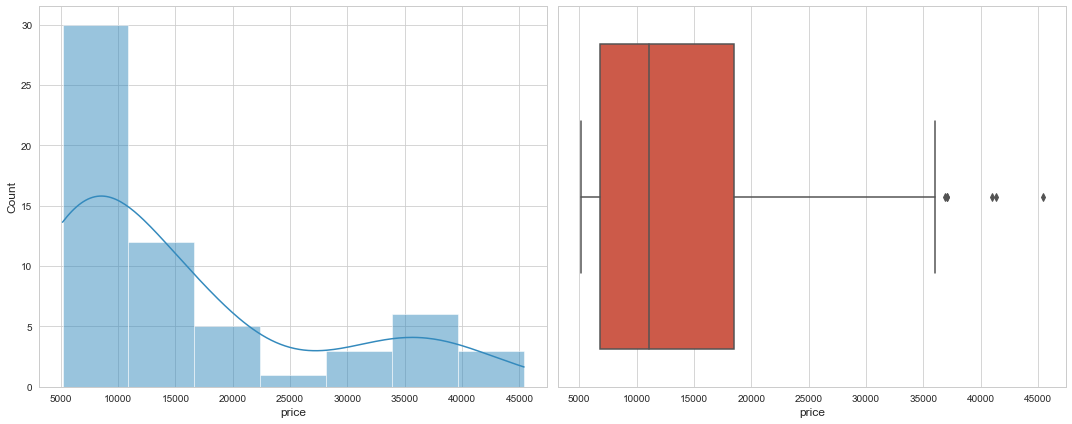

In [34]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
plt.subplot(121)
sns.histplot(data=car, x='price', kde=True)

plt.subplot(122)
sns.boxplot(data=car, x='price')
plt.tight_layout() # the space between the two picture is less
plt.show()

## Price prediction with Linear Regression 

**Linear Regression** is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables.

 The relationship between the variables is represented by the equation of a straight line:

Y = β0 + β1X1 + β2X2 + ... + βn*Xn + ε

where Y is the dependent variable, X1, X2, ..., Xn are the independent variables, β0, β1, β2, ..., βn are the coefficients (slopes), and ε represents the error term. The coefficients represent the impact of each independent variable on the dependent variable.

## P-values 

*P-Value* - P values are one of the best ways to determine if a variable is redundant(usefull or not) but they provide no information.

If a variable has a p-values >0.05, we can disregard it.

In [35]:
from sklearn.feature_selection import f_regression,SelectKBest

X = car.drop('price',axis=1)
y = car['price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3)

array([0.214, 0.309, 0.   , 0.   , 0.715, 0.   , 0.   , 0.   ])

In [36]:
model_summry = pd.DataFrame(data=['company', 'body-style', 'engine-type', 'num-of-cylinders','wheel-base', 'length', 'horsepower', 'average-mileage'], columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry

,Features,p-values
0,company,0.214
1,body-style,0.309
2,engine-type,0.000
3,num-of-cylinders,0.000
4,wheel-base,0.715
5,length,0.000
6,horsepower,0.000
7,average-mileage,0.000


## Feature Importance 

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

plot graph of feature importances for better visualization


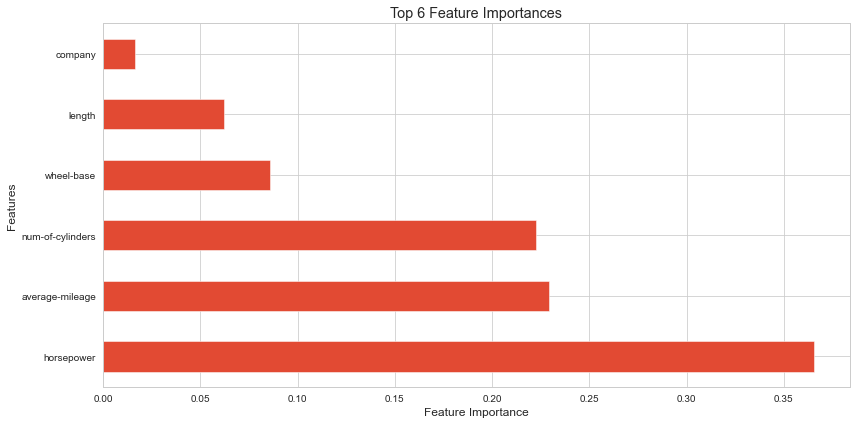

In [38]:
plt.figure(figsize=[12, 6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 6 Feature Importances')
plt.show()

## Model Development 

## Declaring dependent and independent variable

In [41]:
x = car.drop(['company', 'body-style', 'engine-type', 'price'], axis=1)
y = car.price

In [42]:
x.head()

,wheel-base,length,num-of-cylinders,horsepower,average-mileage
index,,,,,
0,88.6,168.8,4,111,21
1,88.6,168.8,4,111,21
2,94.5,171.2,6,154,19
3,99.8,176.6,4,102,24
4,99.4,176.6,5,115,18


In [43]:
y.head()

index
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [44]:
x.shape, y.shape

((60, 5), (60,))

### Spliting the data into training data and testing data

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, 
                                                   random_state=1)

In [46]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (48, 5)
x_test shape: (12, 5)
y_train shape: (48,)
y_test shape: (12,)


In [47]:
x_train.head()

,wheel-base,length,num-of-cylinders,horsepower,average-mileage
index,,,,,
63,98.4,175.7,8,288,17
3,99.8,176.6,4,102,24
36,93.1,159.1,4,68,30
50,93.7,157.3,4,68,31
30,94.3,170.7,4,78,24


In [48]:
x_test.head()

,wheel-base,length,num-of-cylinders,horsepower,average-mileage
index,,,,,
53,94.5,165.3,4,55,45
55,94.5,165.3,4,69,31
2,94.5,171.2,6,154,19
67,95.7,158.7,4,62,31
69,95.7,169.7,4,62,31


In [49]:
y_train.head()

index
63    37028.0
3     13950.0
36     5195.0
50     6189.0
30     6785.0
Name: price, dtype: float64

In [50]:
y_test.head()

index
53     7099.0
55     6849.0
2     16500.0
67     6338.0
69     6918.0
Name: price, dtype: float64

## Importing and fitting the model on training data

In [51]:
from sklearn.linear_model import LinearRegression

car_model = LinearRegression()
car_model.fit(x_train, y_train)

LinearRegression()

### Checking the slope m and the intercept c

In [52]:
m = car_model.coef_
c = car_model.intercept_

m,c

(array([ 475.9476819 ,   52.63617824, -138.35035256,  159.93104863,
          21.02525371]),
 -57576.17567159496)

### Predicting the target: price against the predictors in the training data set
### predicting on training data

In [53]:
y_pred_train = car_model.predict(x_train)
y_pred_train

array([43816.02124099, 15483.12369743,  6061.6369785 ,  6273.48572053,
        8716.5128283 , 30246.39988601,  6834.38238782, 13689.40188465,
        7493.18161391,  6312.11308619,  6273.48572053, 24268.63856278,
        6339.48544209, 24268.63856278,  6423.58645695, 11378.2254351 ,
       11379.58515378,   174.39035848,  7047.59208978,  6834.38238782,
       13175.48430709, 34829.95508486, 34345.23480787, 17107.34638198,
        7047.59208978, 12910.91705478,  6082.66223221,  6312.11308619,
       20165.19697028,  8854.03512952, 20165.19697028, 13218.88816685,
       41575.90205814, 20222.22402631, 26544.4466263 , 15979.02138539,
       13757.5256295 , 11118.25114642,  6273.48572053, 11118.25114642,
        7200.23700666, 16555.94079008, 30499.05354154, 18858.8911454 ,
       15979.02138539, 33740.12399053, 23804.50719017, 11378.2254351 ])

### Predicting the target: price against the predictors in the testing data set
### predicting on validation data

In [54]:
y_pred_test = car_model.predict(x_test)
y_pred_test

array([ 5290.58321177,  7235.26434056, 20610.95317586,  6339.48544209,
        6918.48340268, 26544.4466263 , 39534.35144007,  6399.63724282,
        7235.26434056,  6082.66223221, 34345.23480787, 26564.05265083])

### Mean squared error

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred_test)

16509666.202145455

### Accuracy

In [56]:
accuracy = r2_score(y_test, y_pred_test)
print("the model has an accuracy of", accuracy*100)

the model has an accuracy of 89.92403331753476


## r2_score 

In [57]:
r2score_train= r2_score(y_train, y_pred_train)
r2score_train

0.8581153262239751

In [58]:
r2score_test= r2_score(y_test, y_pred_test)
r2score_test

0.8992403331753477

### Visualize the actual price and predicted price

In [60]:
car_df = pd.DataFrame({"Actual": y_test,
                       "Predicted": y_pred_test,
                       "Error": abs(y_test-y_pred_test)})

car_df.head().style.background_gradient(cmap="RdYlGn")

,Actual,Predicted,Error
index,,,
53,7099.000000,5290.583212,1808.416788
55,6849.000000,7235.264341,386.264341
2,16500.000000,20610.953176,4110.953176
67,6338.000000,6339.485442,1.485442
69,6918.000000,6918.483403,0.483403


In [61]:
car_df.Error.describe()


count       12.000000
mean      2403.738523
std       3421.595691
min          0.483403
25%        292.782697
50%       1107.701217
75%       2384.050885
max      10814.052651
Name: Error, dtype: float64

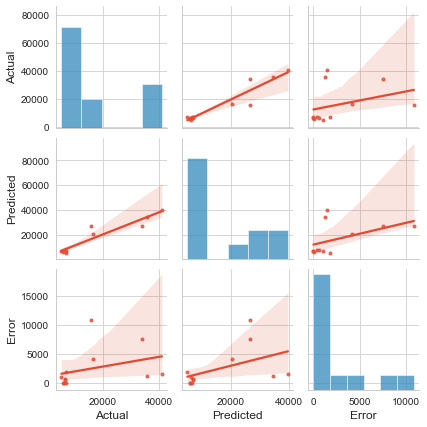

In [62]:
sns.pairplot(car_df.iloc[0:], kind="reg", height=2, markers=".")

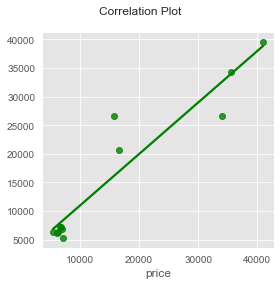

In [63]:
plt.style.use('ggplot')
plt.figure(figsize=(4, 4))
sns.regplot(x=y_test, 
            y=y_pred_test, 
            ci=None, 
            color="g")

plt.suptitle("Correlation Plot")
plt.tight_layout()
plt.show()

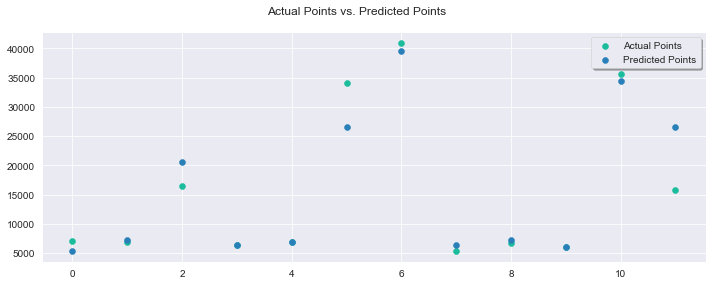

In [64]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')

plt.scatter(x=range(12),
           y=y_test.head(12),
           color="#1abc9c",
           label="Actual Points")
plt.scatter(x=range(12),
           y=y_pred_test[:12],
           color="#2980b9",
           label="Predicted Points")

plt.suptitle("Actual Points vs. Predicted Points")
plt.legend(shadow=True,
           loc="best")
plt.show()

##  Comparing "Actual" vs "Predicted" on Training Data using Kde

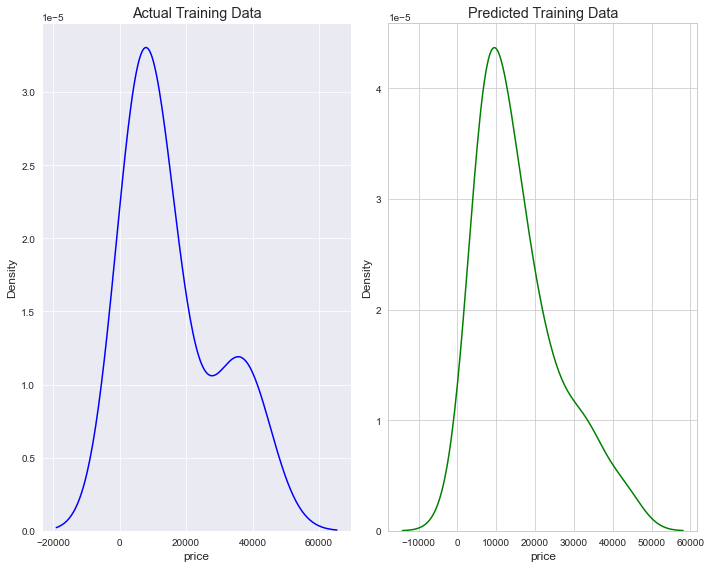

In [65]:
# Actual
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
plt.title('Actual Training Data')
plt.xlabel('price')
sns.kdeplot(y_test, color='b')

# Predicted
plt.subplot(1, 2, 2)
sns.set_style('whitegrid')
plt.title('Predicted Training Data')
plt.xlabel('price')
sns.kdeplot(y_pred_train, color='g')
plt.show()

plt.close()

## Comparing "Actual" vs "Predicted" on Testing Data using Kde 

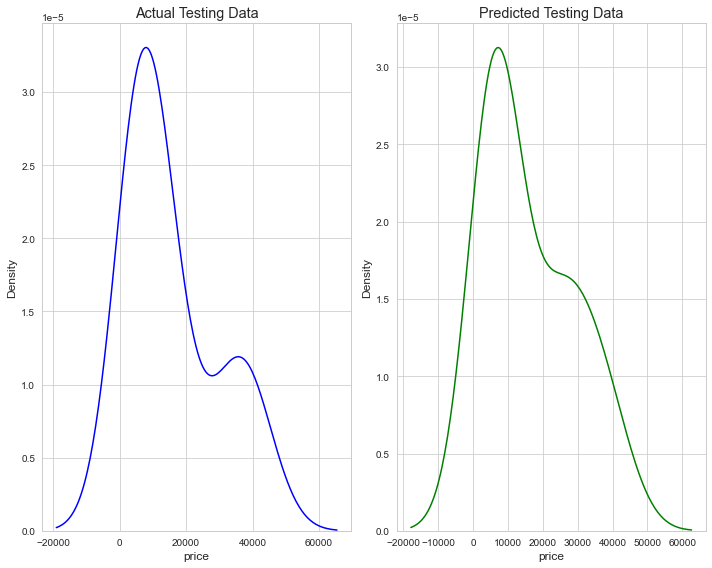

In [66]:
# Actual
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
plt.title('Actual Testing Data')
plt.xlabel('price')
sns.kdeplot(y_test, color='b')

# Predicted
plt.subplot(1, 2, 2)
sns.set_style('whitegrid')
plt.title('Predicted Testing Data')
plt.xlabel('price')
sns.kdeplot(y_pred_test, color='g')
plt.show()

plt.close()

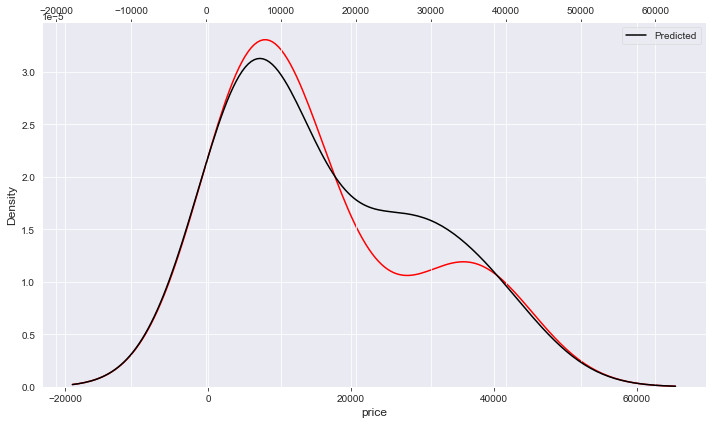

In [67]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

sns.kdeplot(y_test, color="r", label="Actual")

sns.despine()
# both plots will share the y-axis
ax1 = plt.twiny()

sns.kdeplot(y_pred_test, ax=ax1, color="black", label="Predicted")
plt.tight_layout()
plt.legend()
plt.show()


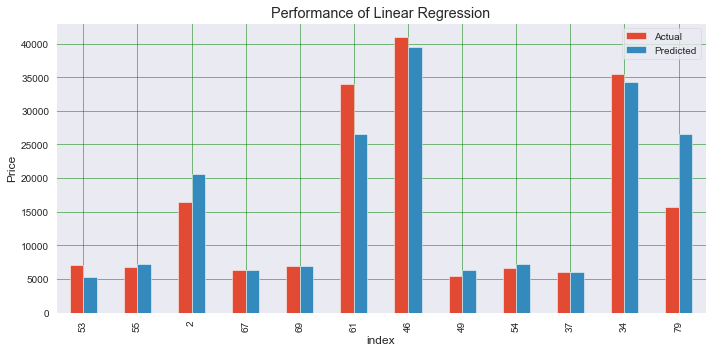

In [68]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df_check = df_check.head(12)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Linear Regression')
plt.ylabel('Price')
plt.show()


In [69]:
x_test.tail()

,wheel-base,length,num-of-cylinders,horsepower,average-mileage
index,,,,,
49,93.7,157.3,4,68,37
54,94.5,165.3,4,69,31
37,93.1,159.1,4,68,31
34,113.0,199.6,6,176,15
79,104.5,187.8,6,156,19


In [70]:
y_test.tail()

index
49     5389.0
54     6649.0
37     6095.0
34    35550.0
79    15750.0
Name: price, dtype: float64

### Let's predict on the new data

In [75]:
features = pd.DataFrame({'wheel-base':[100, 103.5], 
 'length':[177, 189.0],
 'num-of-cylinders':[5,4],                       
 'horsepower':[117, 182], 
 'average-mileage':[20, 16]}, index=[0, 1])

features

,wheel-base,length,num-of-cylinders,horsepower,average-mileage
0,100.0,177.0,5,117,20
1,103.5,189.0,4,182,16


In [76]:
car_model.predict(features)


array([17775.8820671 , 30523.10059114])

## Conclusion

The model achieved an accuracy of approximately 89% on the testing data, which indicates that it performs well in predicting price.
In conclusion, the car price prediction project used linear regression to develop a model that can estimate the price of a car based on its features. The model achieved a certain level of accuracy in predicting car prices. This information can be valuable for pricing strategies and decision-making in the automotive industry.